# Image celebrity classification project

In [20]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
#Importing image
img=cv2.imread("./test_imgs/margot.jpg")
img.shape

(416, 416, 3)

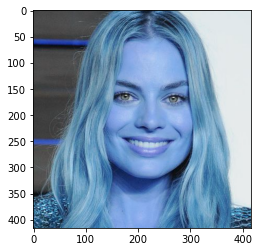

In [22]:
#Show image
plt.imshow(img)

In [23]:
#turning into gray color
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(416, 416)

In [24]:
gray

array([[ 69,  70,  70, ..., 231, 231, 231],
       [ 69,  69,  70, ..., 231, 231, 231],
       [ 68,  68,  69, ..., 231, 231, 231],
       ...,
       [ 69,  51,  64, ...,  79,  82,  59],
       [ 77,  65,  66, ...,  72,  81,  85],
       [ 50,  63,  78, ...,  42,  64,  49]], dtype=uint8)

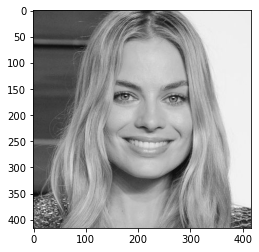

In [25]:
plt.imshow(gray,cmap="gray")

In [26]:
#Open cascade classifier for detecting face and eyes
face_cascade=cv2.CascadeClassifier("./opencv/haarcascade_frontalface_default.xml")
eye_cascade=cv2.CascadeClassifier("./opencv/haarcascade_eye.xml")

faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[111,  77, 223, 223]], dtype=int32)

In [27]:
#x,y,width,height
(x,y,w,h)=faces[0]
x,y,w,h

(111, 77, 223, 223)

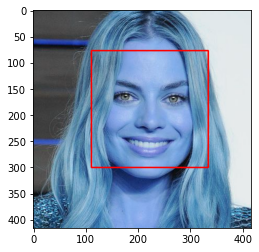

In [28]:
#Showing rectangle that covers face
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

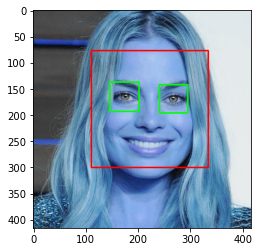

In [29]:
#Making rectangles that  detects face and eyes
cv2.destroyAllWindows
for x, y, w, h in faces:
    face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0),2)
    # roi = 'region of interest' --> face region
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w] 
    eyes = eye_cascade.detectMultiScale(roi_gray)
    
    for ex, ey, ew, eh in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0,255,0),2)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

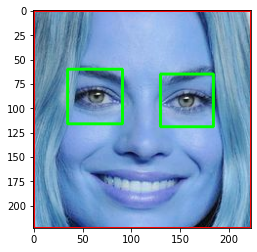

In [30]:
plt.imshow(roi_color,cmap="gray")

In [31]:
# function that takes an image as an input and returns cropped face only if two eyes are detected
def get_cropped_img_if_2_eyes(image_path):
    """This function takes an image as an input and returns cropped image of face region only if
    two eyes are detected on an image. If one eye is detected function returns None."""
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        if len(eyes)>=2:
            return roi_color

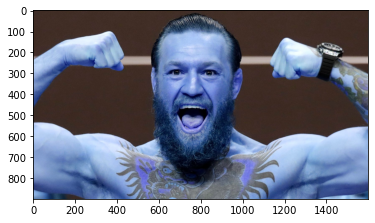

In [32]:
original_image=cv2.imread("./test_imgs/conor.jpg")
plt.imshow(original_image)

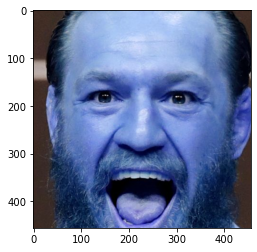

In [33]:
cropped_image=get_cropped_img_if_2_eyes("./test_imgs/conor.jpg")
plt.imshow(cropped_image)

In [34]:
#setting image path to folder croppped
path_to_data="./dataset/"
path_to_crop_data="./dataset/cropped/"

In [35]:
# save paths of subdirectiories to a list
import os

img_directories = []

for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_directories.append(entry.path)

In [36]:
img_directories

['./dataset/angelina_jolie',
 './dataset/conor_mcgregor',
 './dataset/lebron_james',
 './dataset/margot_robbie',
 './dataset/muhammad_ali']

In [37]:
# make 'cropped' directory if it doesn't exist
import shutil

if os.path.exists(path_to_crop_data):
    shutil.rmtree(path_to_crop_data)
os.mkdir(path_to_crop_data)

In [38]:
#Generating cropped images in specific folders

cropped_image_directories=[]
name_files_dict={}

for img_dir in img_directories:
    count=1
    name_files=img_dir.split("/")[-1]
    print(name_files)
    
    name_files_dict[name_files]=[]
    
    
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_img_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_crop_data + name_files
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_directories.append(cropped_folder)
                print("Generating cropped images in floder:",cropped_folder)
                
            cropped_file_name=name_files + str(count) + ".png"    
            cropped_file_path=cropped_folder + "/"+ cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            name_files_dict[name_files].append(cropped_file_path)
            count += 1

angelina_jolie
Generating cropped images in floder: ./dataset/cropped/angelina_jolie
conor_mcgregor
Generating cropped images in floder: ./dataset/cropped/conor_mcgregor
lebron_james
Generating cropped images in floder: ./dataset/cropped/lebron_james
margot_robbie
Generating cropped images in floder: ./dataset/cropped/margot_robbie
muhammad_ali
Generating cropped images in floder: ./dataset/cropped/muhammad_ali


In [39]:
# rebuild dictionary because of manually deleting images that were not good for model
name_files_dict = {}
for img_dir in cropped_image_directories:
    name_files = img_dir.split('/')[-1]
    file_name_list = []
    for entry in os.scandir(img_dir):
        file_name_list.append(entry.path)
    name_files_dict[name_files] = file_name_list

In [40]:
#all cropped images in folders
name_files_dict

{'angelina_jolie': ['./dataset/cropped/angelina_jolie\\angelina_jolie1.png',
  './dataset/cropped/angelina_jolie\\angelina_jolie10.png',
  './dataset/cropped/angelina_jolie\\angelina_jolie11.png',
  './dataset/cropped/angelina_jolie\\angelina_jolie12.png',
  './dataset/cropped/angelina_jolie\\angelina_jolie13.png',
  './dataset/cropped/angelina_jolie\\angelina_jolie14.png',
  './dataset/cropped/angelina_jolie\\angelina_jolie15.png',
  './dataset/cropped/angelina_jolie\\angelina_jolie16.png',
  './dataset/cropped/angelina_jolie\\angelina_jolie17.png',
  './dataset/cropped/angelina_jolie\\angelina_jolie18.png',
  './dataset/cropped/angelina_jolie\\angelina_jolie19.png',
  './dataset/cropped/angelina_jolie\\angelina_jolie2.png',
  './dataset/cropped/angelina_jolie\\angelina_jolie20.png',
  './dataset/cropped/angelina_jolie\\angelina_jolie21.png',
  './dataset/cropped/angelina_jolie\\angelina_jolie22.png',
  './dataset/cropped/angelina_jolie\\angelina_jolie23.png',
  './dataset/cropped/ang

In [41]:
# import wawelet
import pywt

In [42]:
# wavelet transformation function
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray, cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

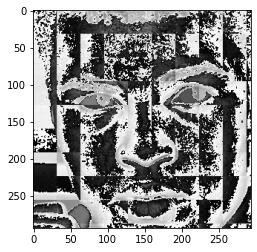

In [43]:
# test wavelet transformation
img_haar_test = cv2.imread('./dataset/cropped/muhammad_ali/muhammad_ali1.png')

img_haar = w2d(img_haar_test, 'db1', 5)

plt.imshow(img_haar, cmap='gray')

In wavelet transformed image, you can see edges clearly and that can give us facial structure of eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier

In [44]:
# assign number to each celebrity name 
classification_dict = {}
count = 0
for name_file in name_files_dict.keys():
    classification_dict[name_file] = count
    count = count + 1
classification_dict

{'angelina_jolie': 0,
 'conor_mcgregor': 1,
 'lebron_james': 2,
 'margot_robbie': 3,
 'muhammad_ali': 4}

In [45]:
#features and target
X=[] 
y=[]
for name_file, train_files in name_files_dict.items():
    for train_img in train_files:
        img = cv2.imread(train_img)
        scalled_img = cv2.resize(img, (32, 32))
        img_haar = w2d(img,'db1',5)
        scalled_img_haar = cv2.resize(img_haar, (32, 32))
        combined_img = np.vstack((scalled_img.reshape(32*32*3,1),scalled_img_haar.reshape(32*32,1)))
        X.append(combined_img)
        y.append(classification_dict[name_file])

In [46]:
# size of each image (should be: 32*32*3 + 32*32 = 4096)
len(X[0])

4096

In [47]:
# reshape X and convert to float
X=np.array(X).reshape(len(X),4096).astype(float)
X.shape

(101, 4096)

In [48]:
#checking
X[0]

array([135., 122., 172., ..., 235.,  54., 233.])

## Training model

In [49]:
#Importing moduls
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [50]:
# Splitting on train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [51]:
# create sklearn pipeline (scale data using StandardScaler() or MinMaxScaler(),create SVC model)
pipe=Pipeline([("scaler", StandardScaler()),("svc", SVC(kernel="rbf",C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.8461538461538461

In [52]:
#looking for f1-score
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.75      0.75      0.75         4
           2       1.00      0.83      0.91         6
           3       0.71      1.00      0.83         5
           4       1.00      1.00      1.00         4

    accuracy                           0.85        26
   macro avg       0.86      0.86      0.85        26
weighted avg       0.86      0.85      0.85        26



In [53]:
# GridSearch to find best performing model and best hyperparameters
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [54]:
#Setting dictionary with parameters for grid search
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [55]:
#Calculating best score for particular model
scores=[]
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.853333,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.706667,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.853333,{'logisticregression__C': 1}


Both SVM and LogisticRegression have same best score 85.3%.

In [56]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [57]:
best_estimators['svm'].score(X_test,y_test)

0.8461538461538461

In [58]:
best_estimators['random_forest'].score(X_test,y_test)

0.6538461538461539

In [59]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8846153846153846

LogisticRegression model has best score so we will use this model for image classification.

In [60]:
# save best classifier into a variable
best_clf = best_estimators['logistic_regression']

In [61]:
# make confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[5, 0, 1, 1, 0],
       [0, 4, 0, 0, 0],
       [0, 0, 6, 0, 0],
       [1, 0, 0, 4, 0],
       [0, 0, 0, 0, 4]], dtype=int64)

Text(69.0, 0.5, 'Truth')

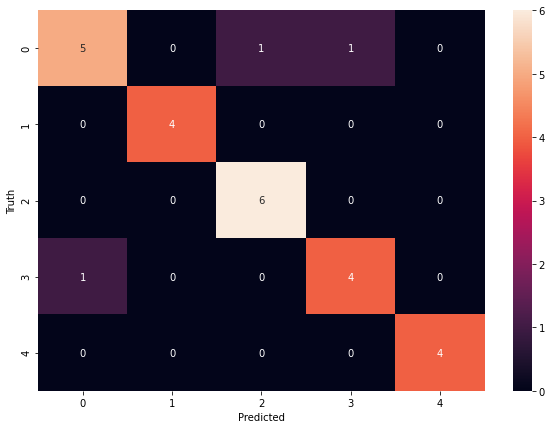

In [62]:
# plot confusion matrix
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [63]:
classification_dict

{'angelina_jolie': 0,
 'conor_mcgregor': 1,
 'lebron_james': 2,
 'margot_robbie': 3,
 'muhammad_ali': 4}

The results on diagonal are good predicted reesults. We have 6 good predicted matches for LeBron James.The numbers that are above or below diagonal are numbers that hasn't been good predicted. For example the "Truth" value of 3 is Margot Robbie and we can see that our model predicted Angleina Jolie instead Margot Robbie.

In [64]:
import joblib

In [65]:
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'model_pickle.pkl')

['model_pickle.pkl']

In [66]:
#Saving classification dictionary as json
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(classification_dict))